### Multivariate Linear Regression
Today we will learn how to implement multivariate linear regression. The task is to predict the price of a house based on the size of the house in square feet and the number of bedrooms in the house. so, here we have 2 independent variables and 1 dependent variable.

### Reading the dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data\ex1data2.txt', header = None, names = ['Size', 'Bedrooms', 'Price'])
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Since the scale of the values of the variables is vastly different, there is a need to perform 'Feature Normalization'. Otherwise, the weightage of values in size variable will be much more than the values in bedrooms variable supressing the contributions of the bedrooms feature.

In feature normalization, we adjust the scale of the features by subtracting the mean from each value of the feature and then dividing by the standard deviation or the range of the values in the feature.

In [3]:
df = (df - df.mean())/df.std()

In [4]:
df.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Adding ones to the dataframe

In [5]:
df.insert(0, 'Ones', 1)
df.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


### Setting X (training data) and y (target variable)

In [6]:
cols = df.shape[1]

In [7]:
X1 = df.iloc[:, 0:cols-1]
y1 = df.iloc[:, cols-1:cols]

### Convert to matrices and initialize theta

In [8]:
X1 = np.matrix(X1.values)
y1 = np.matrix(y1.values)

In [9]:
theta = np.matrix(np.array([0,0,0]))

In [10]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [11]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term  = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X1, y1, theta)
        
    return theta, cost

### Initialize variables for learning rate and iterations

In [12]:
alpha = 0.01  
iters = 1000

In [13]:
# perform linear regression on the dataset
g, cost = gradientDescent(X1, y1, theta, alpha, iters)

In [14]:
# get the cost(error) of the model
computeCost(X1, y1, g)

0.13070336960771892

###  Plotting the training progress to check that the error is decreasing with each iteration of gradient descent.

Text(0.5,1,'Error vs Training Epoch')

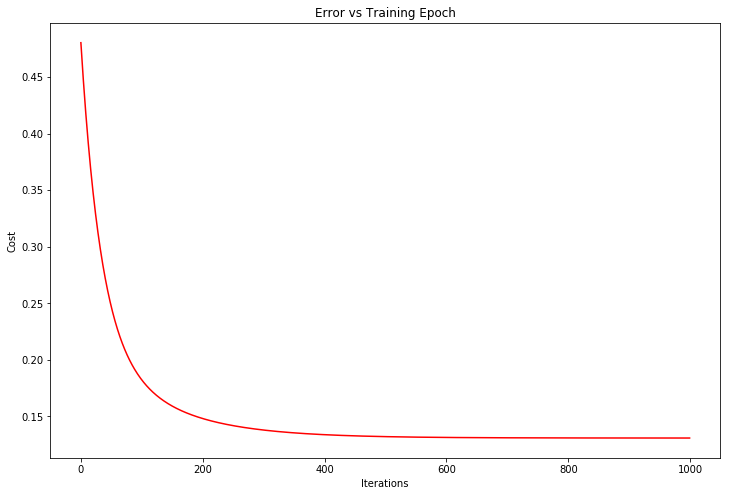

In [77]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')

### The cost (error) of the solution decreases with each training epoch. This shows that gradient descent worked properly and our algorithm worked.